# Equações Diferenciais Ordinárias

Em matemática, uma equação diferencial ordinária (**ordinary differential equation** - **ODE**) é uma equação diferencial que contém uma ou mais funções de uma variável independente e as derivadas dessas funções.

O termo ordinária é usado em contraste com o termo equação diferencial parcial, que pode referir-se a mais de uma variável independente.

Uma equação diferencial linear é uma equação diferencial que é definida por um polinômio linear na função desconhecida e suas derivadas, que é uma equação da forma:

\begin{equation}
a_0 (x) y + a_1 (x) y' + a_2 (x) y'' + ... + a_n (x) y^{(n)} + b(x) = 0
\end{equation}

Onde $a_0 (x),$ ... $, a_n (x)$ e $b(x)$ são funções diferenciáveis arbitrárias que não precisam ser lineares, e $y',$ ... $,y^{(n)}$ são as derivadas sucessivas da função desconhecida $y$ da variável $x$. 

Entre as equações diferenciais ordinárias, as equações diferenciais lineares desempenham um papel proeminente por várias razões. A maioria das funções elementares e especiais que são encontradas na física e na matemática aplicada são soluções de equações diferenciais lineares. Quando fenômenos físicos são modelados com equações não lineares, eles geralmente são aproximados por equações diferenciais lineares para uma solução mais fácil.

Equações diferenciais ordinárias surgem em muitos contextos da matemática e das ciências sociais e naturais. As descrições matemáticas de mudança usam diferenciais e derivadas. Vários diferenciais, derivadas e funções tornam-se relacionados por meio de equações, de modo que uma equação diferencial é um resultado que descreve fenômenos, evolução e variação que mudam dinamicamente. Freqüentemente, as grandezas são definidas como a taxa de variação de outras grandezas (por exemplo, derivadas de deslocamento em relação ao tempo).

A trajetória de um projétil lançado de um canhão segue uma curva determinada por uma equação diferencial ordinária derivada da segunda lei de Newton:

![img](https://raw.githubusercontent.com/the-akira/Python-Matematica/master/imagens/trajetoriaparabolica.png)

## Python

Equações Diferenciais são resolvidas em Python com o módulo [scipy.integrate](https://docs.scipy.org/doc/scipy/reference/integrate.html) utilizando a função **odeint**.

**odeint** requer três inputs:

`y = odeint(model, y0, t)`

1. **model**: Nome da Função que retorna o valor da derivada nos valores requisitados **y** e **t** como **dydt = model(y,t)**.
2. **y0**: Condições iniciais dos estados diferenciais.
3. **t**: Pontos temporais no qual a solução deve ser reportada. Pontos internos adicionais são normalmente calculados para manter a acurácia da solução, porém não reportado.

Um exemplo do uso de **odeint** é com a seguinte equação diferencial com o parâmetro `k = 0.3`, a condição inicial `y0 = 5` e a seguinte equação diferencial:

\begin{equation}
\frac{{dy(t)}}{{dt}} = -k y(t)
\end{equation}

O código Python primeiro importa os módulos necessários (**NumPy**, **SciPy** e **matplotlib**). 

O modelo, condições iniciais e pontos temporais são definidos como inputs para a função **odeint** para calcular numericamente **y(t)**.

Começamos então importando as bibliotecas necessárias:

In [4]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

Definimos a função que retorna **dy/dt**:

In [5]:
def modelo(y,t):
    k = 0.3
    dydt = -k * y
    return dydt

Definimos a condição inicial:

In [6]:
y0 = 5

Definimos os pontos temporais:

In [7]:
t = np.linspace(0,20)

Resolvemos a Equação Diferencial:

In [8]:
y = odeint(modelo,y0,t)

E então plotamos o resultado:

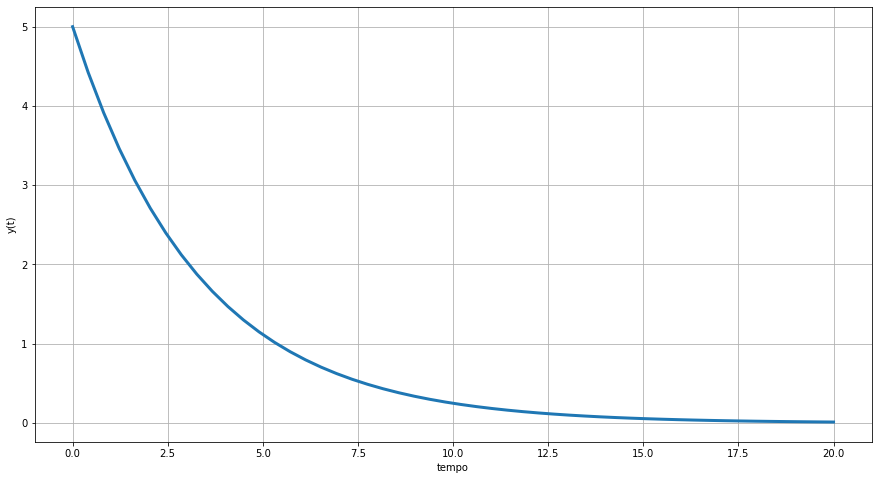

In [11]:
plt.figure(figsize=(15,8))
plt.plot(t,y, lw=3)
plt.xlabel('tempo')
plt.ylabel('y(t)')
plt.grid()
plt.show()

Novamente vamos definir uma função que retorna **dy/dt**, mas dessa vez ela poderá receber **k** como argumento:

In [12]:
def modelo(y,t,k):
    dydt = -k * y
    return dydt

Definimos a condição inicial:

In [13]:
y0 = 5

Definimos os pontos temporais:

In [14]:
t = np.linspace(0,20)

Resolvemos a Equação Diferencial para diferentes valores de **k**:

In [15]:
k = 0.1
y1 = odeint(modelo,y0,t, args=(k,))
k = 0.2
y2 = odeint(modelo,y0,t, args=(k,))
k = 0.5
y3 = odeint(modelo,y0,t, args=(k,))

Plotamos os resultados:

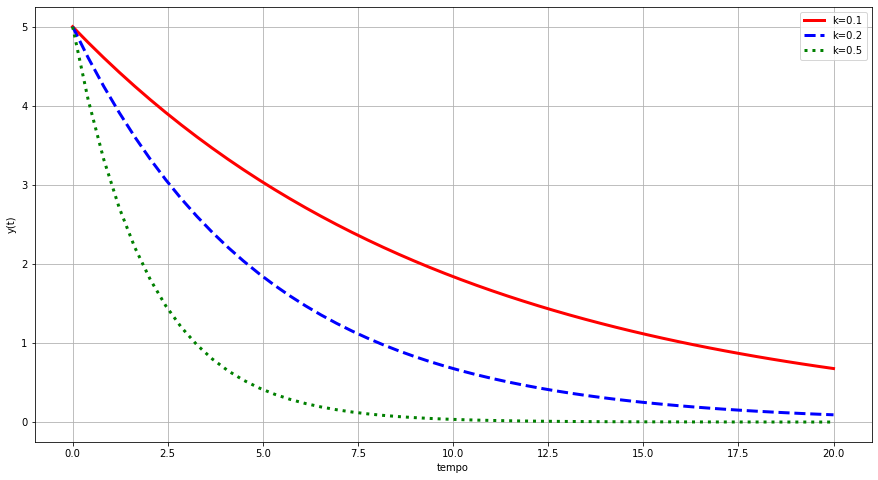

In [16]:
plt.figure(figsize=(15,8))
plt.plot(t, y1, 'r-', linewidth=3, label='k=0.1')
plt.plot(t, y2, 'b--', linewidth=3, label='k=0.2')
plt.plot(t, y3, 'g:', linewidth=3, label='k=0.5')
plt.xlabel('tempo')
plt.ylabel('y(t)')
plt.legend()
plt.grid()
plt.show()

## Exercícios

Busque uma solução numérica para as seguintes equações diferenciais com as condições iniciais associadas. Expanda o horizonte temporal requisitado até que a solução alcance um estado estável. Mostre uma plotagem dos estados (**x(t)** e/ou **y(t)**). Reporte o valor final de cada estado como: $t \rightarrow \infty$.

### Problema 1

\begin{equation}
\frac{{dy(t)}}{{dt}} = -y(t) + 1
\end{equation}

\begin{equation}
y(0) = 0
\end{equation}

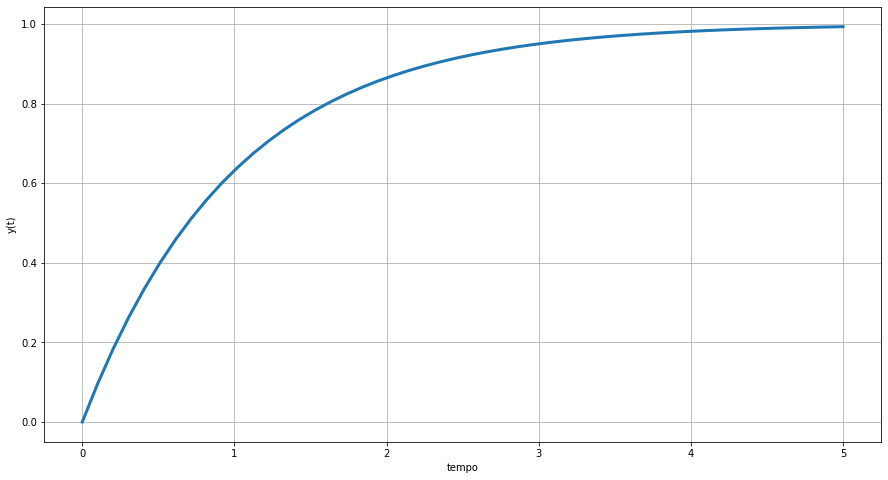

In [17]:
# Função que retorna dy/dt
def model(y,t):
    dydt = -y + 1.0
    return dydt

# Condição inicial
y0 = 0

# Pontos temporais
t = np.linspace(0,5)

# Resolve a Equação Diferencial
y = odeint(model,y0,t)

# Plotagem dos Resultados
plt.figure(figsize=(15,8))
plt.plot(t,y, lw=3)
plt.xlabel('tempo')
plt.ylabel('y(t)')
plt.grid()
plt.show()

### Problema 2 

\begin{equation}
5 ~ \frac{{dy(t)}}{{dt}} = -y(t) + u(t)
\end{equation}

\begin{equation}
y(0) = 1
\end{equation}

$u$ passos de $0$ para $2$ em $t = 10$.

**Dica**: Iniciar dividindo ambos os lados da equação por 5.

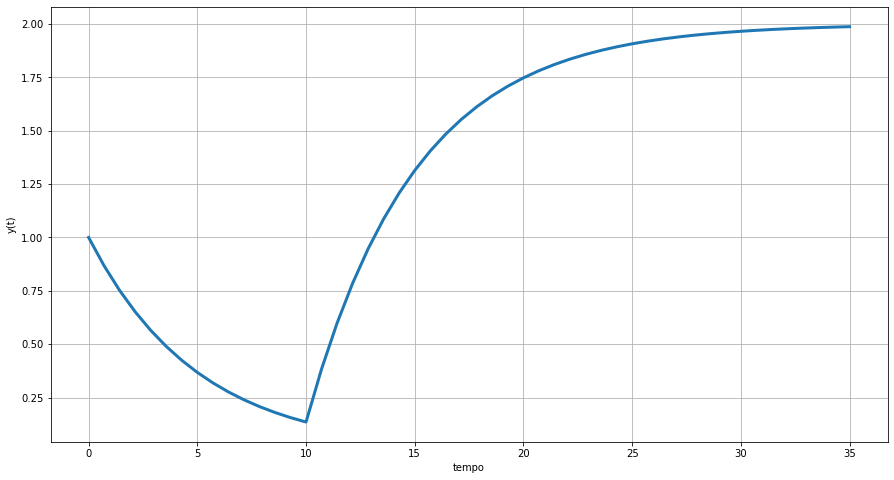

In [18]:
# Função que retorna dy/dt
def model(y,t):
    if (t < 10.0):
        u = 0.0
    else:
        u = 2.0
    dydt = (-y + u)/5.0
    return dydt
    
# Condição inicial
y0 = 1

# Pontos temporais
t = np.linspace(0,35)

# Resolve a Equação Diferencial
y = odeint(model,y0,t)

# Plotagem dos Resultados
plt.figure(figsize=(15,8))
plt.plot(t,y, lw=3)
plt.xlabel('tempo')
plt.ylabel('y(t)')
plt.grid()
plt.show()

### Problema 3

Resolva para $x(t)$ e $y(t)$ e mostre que as soluções são equivalentes:

\begin{equation}
\frac{{dx(t)}}{{dt}} = 3exp(-t)
\end{equation}

\begin{equation}
\frac{{dy(t)}}{{dt}} = y(t)
\end{equation}

\begin{equation}
x(0) = 0
\end{equation}

\begin{equation}
y(0) = 0
\end{equation}

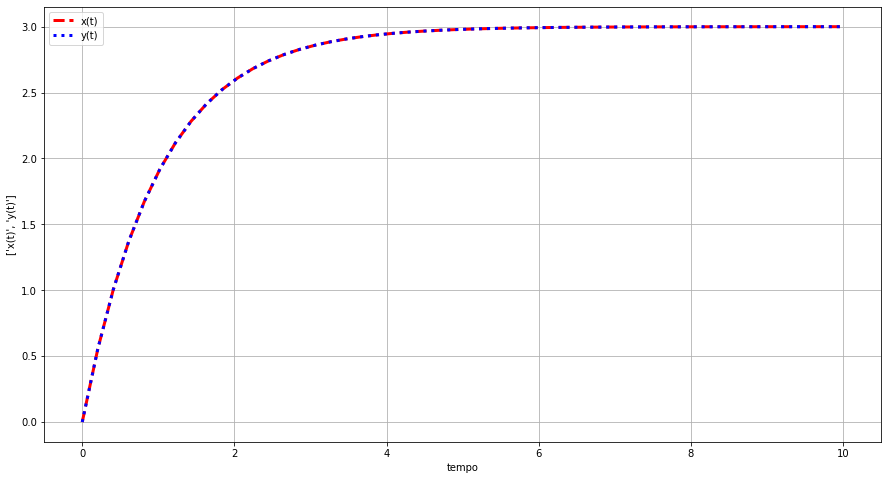

In [19]:
# Função que retorna dy/dt
def model(z,t):
    x = z[0]
    y = z[1]
    dxdt = 3.0 * np.exp(-t)
    dydt = 3.0 - y
    return [dxdt,dydt]
    
# Condição inicial
z0 = [0,0]

# Pontos temporais
t = np.linspace(0,10)

# Resolve a Equação Diferencial
z = odeint(model,z0,t)

x = z[:,0]
y = z[:,1]

# Plotagem dos Resultados
plt.figure(figsize=(15,8))
plt.plot(t,x,'r--', lw=3)
plt.plot(t,y,'b:', lw=3)
plt.xlabel('tempo')
plt.ylabel(['x(t)','y(t)'])
plt.legend(['x(t)','y(t)'])
plt.grid()
plt.show()

### Problema 4

\begin{equation}
2 ~ \frac{{dx(t)}}{{dt}} = -x(t) + u(t)
\end{equation}

\begin{equation}
5 ~ \frac{{dy(t)}}{{dt}} = -y(t) + x(t)
\end{equation}

\begin{equation}
y = 2~S(t - 5), ~ x(0) = 0, ~ y(0) = 0
\end{equation}

Onde $S(t - 5)$ é um função step que altera de $0$ para $1$ em $t = 5$. Quando ela é multiplicada por $2$, ela muda de $0$ para $2$ no tempo $t = 5$.

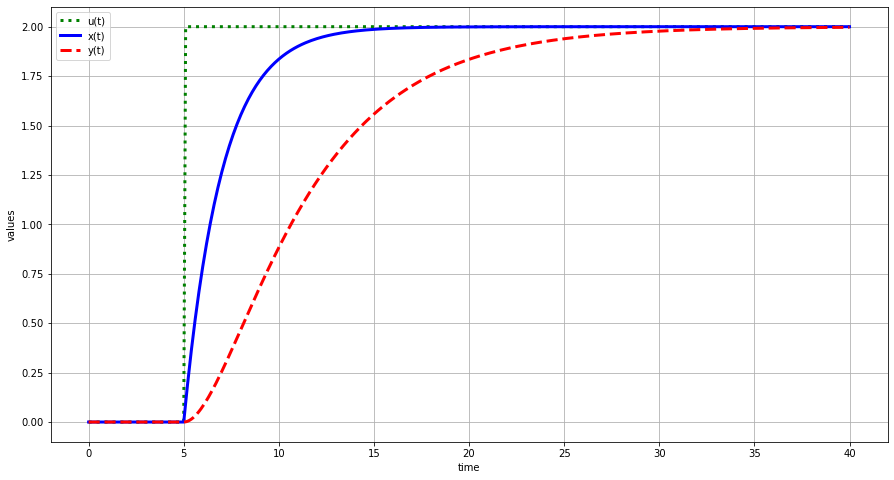

In [20]:
# Função que retorna dz/dt
def model(z,t,u):
    x = z[0]
    y = z[1]
    dxdt = (-x + u)/2.0
    dydt = (-y + x)/5.0
    dzdt = [dxdt,dydt]
    return dzdt

# Condição inicial
z0 = [0,0]

# Número de pontos temporais
n = 401

# Pontos temporais
t = np.linspace(0,40,n)

# Step input
u = np.zeros(n)

# Altera para 2.0 em tempo = 5.0
u[51:] = 2.0

# Guarda a solução
x = np.empty_like(t)
y = np.empty_like(t)

# Grava as condições iniciais
x[0] = z0[0]
y[0] = z0[1]

# Resolve a equação diferencial
for i in range(1,n):
    # span para o próximo passo temporal
    tspan = [t[i-1],t[i]]
    # Resolve para o próximo step
    z = odeint(model,z0,tspan,args=(u[i],))
    # Guarda a solução para plotagem
    x[i] = z[1][0]
    y[i] = z[1][1]
    # Próxima condição inicial
    z0 = z[1]

# Plotagem dos Resultados
plt.figure(figsize=(15,8))
plt.plot(t,u, 'g:', label='u(t)', lw=3)
plt.plot(t,x, 'b-', label='x(t)', lw=3)
plt.plot(t,y, 'r--', label='y(t)', lw=3)
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.grid()
plt.show()